# BASIC EDA

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import seaborn as sns
import math

## Importing data

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [3]:
data = pd.concat([train,test])

In [4]:
data.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0.0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0.0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0.0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0.0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0.0


In [5]:
data.tail()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
104475,80,17.348236,1387.858873,Standard,Credit card,No,TV Shows,Yes,Mobile,19.189141,135.445204,35,Comedy,1.411831,7,Female,14,No,Yes,UTKREC613O,NaN
104476,20,8.275459,165.509180,Premium,Bank transfer,Yes,Movies,Yes,Mobile,30.986604,114.868640,17,Drama,2.783849,2,Male,8,Yes,No,MDB4E477PS,NaN
104477,106,18.134343,1922.240365,Basic,Mailed check,No,Movies,Yes,Computer,7.236303,109.583153,31,Comedy,2.991527,1,Male,12,No,Yes,IPDIA02ZE1,NaN
104478,46,19.774010,909.604454,Basic,Bank transfer,No,TV Shows,Yes,TV,25.809285,115.153570,1,Drama,4.998019,0,Female,12,Yes,No,ITLFTPRJGV,NaN
104479,110,7.438385,818.222399,Basic,Bank transfer,Yes,Both,No,Computer,34.146174,132.606801,29,Drama,4.679910,2,Female,7,No,Yes,Y204GZY6NE,NaN


## Descriptive Statistics

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348267 entries, 0 to 104479
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                348267 non-null  int64  
 1   MonthlyCharges            348267 non-null  float64
 2   TotalCharges              348267 non-null  float64
 3   SubscriptionType          348267 non-null  object 
 4   PaymentMethod             348267 non-null  object 
 5   PaperlessBilling          348267 non-null  object 
 6   ContentType               348267 non-null  object 
 7   MultiDeviceAccess         348267 non-null  object 
 8   DeviceRegistered          348267 non-null  object 
 9   ViewingHoursPerWeek       348267 non-null  float64
 10  AverageViewingDuration    348267 non-null  float64
 11  ContentDownloadsPerMonth  348267 non-null  int64  
 12  GenrePreference           348267 non-null  object 
 13  UserRating                348267 non-null  float6

In [7]:
data.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,348267.000000,348267.000000,348267.000000,348267.000000,348267.000000,348267.000000,348267.000000,348267.000000,348267.000000,243787.000000
mean,60.078038,12.485790,749.969013,20.498500,92.378681,24.487729,3.002186,4.505242,12.025076,0.181232
std,34.285060,4.328852,522.387782,11.243565,50.543356,14.430220,1.155087,2.873791,7.196357,0.385211
min,1.000000,4.990051,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.734599,329.095492,10.764544,48.441840,12.000000,2.000775,2.000000,6.000000,0.000000
50%,60.000000,12.480848,649.723393,20.508150,92.337736,25.000000,3.000734,5.000000,12.000000,0.000000
75%,90.000000,16.231932,1086.755071,30.211921,136.121110,37.000000,4.001679,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999785,49.000000,4.999989,9.000000,24.000000,1.000000


In [8]:
data.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn'],
      dtype='object')

In [9]:
data.shape

(348267, 21)

In [10]:
data.nunique()

AccountAge                     119
MonthlyCharges              348267
TotalCharges                348267
SubscriptionType                 3
PaymentMethod                    4
PaperlessBilling                 2
ContentType                      3
MultiDeviceAccess                2
DeviceRegistered                 4
ViewingHoursPerWeek         348267
AverageViewingDuration      348267
ContentDownloadsPerMonth        50
GenrePreference                  5
UserRating                  348267
SupportTicketsPerMonth          10
Gender                           2
WatchlistSize                   25
ParentalControl                  2
SubtitlesEnabled                 2
CustomerID                  348267
Churn                            2
dtype: int64

## Data Cleaning
1. Handle missing values
2. handle duplicates
3. fix data types
4. standardize categorical values

### Handling missing values

In [11]:
train.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

In [12]:
test.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
dtype: int64

<Axes: >

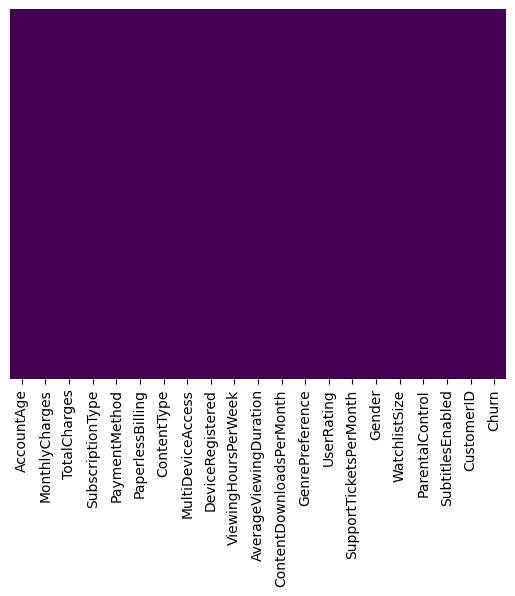

In [13]:
sns.heatmap(train.isnull(), cmap="viridis", yticklabels=False, cbar=False)

<Axes: >

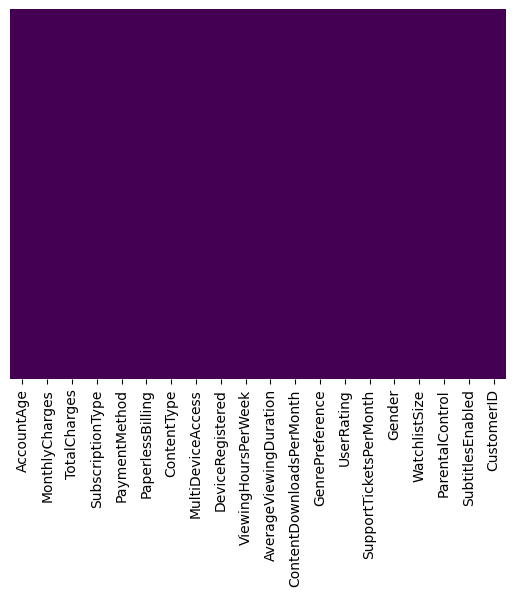

In [14]:
sns.heatmap(test.isnull(), cmap="viridis", yticklabels=False, cbar=False)

**We have no null values**

### Duplicated values

In [15]:
train[train.duplicated()]

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn


In [16]:
test[test.duplicated()]

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID


### fix datatypes

In [17]:
num_columns = [col for col in train.columns if train[col].dtype != "object"]

In [18]:
num_columns

['AccountAge',
 'MonthlyCharges',
 'TotalCharges',
 'ViewingHoursPerWeek',
 'AverageViewingDuration',
 'ContentDownloadsPerMonth',
 'UserRating',
 'SupportTicketsPerMonth',
 'WatchlistSize',
 'Churn']

In [19]:
cat_columns = [col for col in train.columns if col not in num_columns]

In [20]:
cat_columns

['SubscriptionType',
 'PaymentMethod',
 'PaperlessBilling',
 'ContentType',
 'MultiDeviceAccess',
 'DeviceRegistered',
 'GenrePreference',
 'Gender',
 'ParentalControl',
 'SubtitlesEnabled',
 'CustomerID']

In [21]:
num_columns.remove("Churn")
cat_columns.append("Churn")

In [22]:
train[cat_columns].nunique()

SubscriptionType          3
PaymentMethod             4
PaperlessBilling          2
ContentType               3
MultiDeviceAccess         2
DeviceRegistered          4
GenrePreference           5
Gender                    2
ParentalControl           2
SubtitlesEnabled          2
CustomerID           243787
Churn                     2
dtype: int64

In [23]:
for col in cat_columns:
    print(f"{col}--->{train[col].unique()}")

SubscriptionType--->['Premium' 'Basic' 'Standard']
PaymentMethod--->['Mailed check' 'Credit card' 'Electronic check' 'Bank transfer']
PaperlessBilling--->['No' 'Yes']
ContentType--->['Both' 'Movies' 'TV Shows']
MultiDeviceAccess--->['No' 'Yes']
DeviceRegistered--->['Mobile' 'Tablet' 'Computer' 'TV']
GenrePreference--->['Sci-Fi' 'Action' 'Fantasy' 'Drama' 'Comedy']
Gender--->['Male' 'Female']
ParentalControl--->['No' 'Yes']
SubtitlesEnabled--->['No' 'Yes']
CustomerID--->['CB6SXPNVZA' 'S7R2G87O09' 'EASDC20BDT' ... '0H3SWWI7IU' '63SJ44RT4A'
 'A6IN701VRY']
Churn--->[0 1]


In [24]:
train[num_columns].nunique()

AccountAge                     119
MonthlyCharges              243787
TotalCharges                243787
ViewingHoursPerWeek         243787
AverageViewingDuration      243787
ContentDownloadsPerMonth        50
UserRating                  243787
SupportTicketsPerMonth          10
WatchlistSize                   25
dtype: int64

## Univariate Analysis
1. Numerical features: histograms, boxplots, summary stats
2. Categorical features: value counts, barplots, pie charts
3. Check distribution
4. Outliler detection

In [25]:
num_columns

['AccountAge',
 'MonthlyCharges',
 'TotalCharges',
 'ViewingHoursPerWeek',
 'AverageViewingDuration',
 'ContentDownloadsPerMonth',
 'UserRating',
 'SupportTicketsPerMonth',
 'WatchlistSize']

### checking if data is balanced or not

<Axes: xlabel='Churn', ylabel='count'>

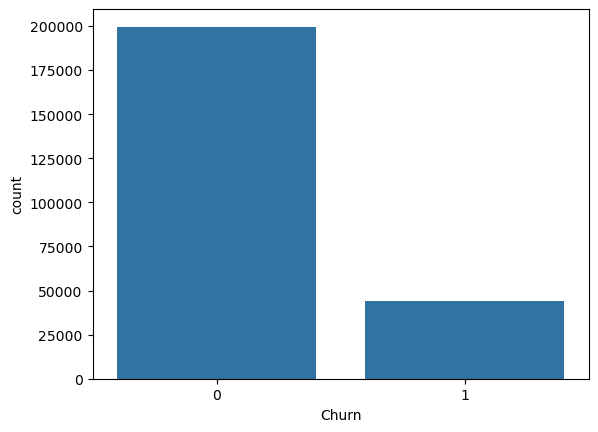

In [26]:
sns.countplot(train, x="Churn")

In [27]:
churn_pct = train["Churn"].value_counts()[1]/train.shape[0]
print(train["Churn"].value_counts())
print(f"Churn percent: {churn_pct*100}%")

Churn
0    199605
1     44182
Name: count, dtype: int64
Churn percent: 18.123197709475892%


### Distribution of numeric columns

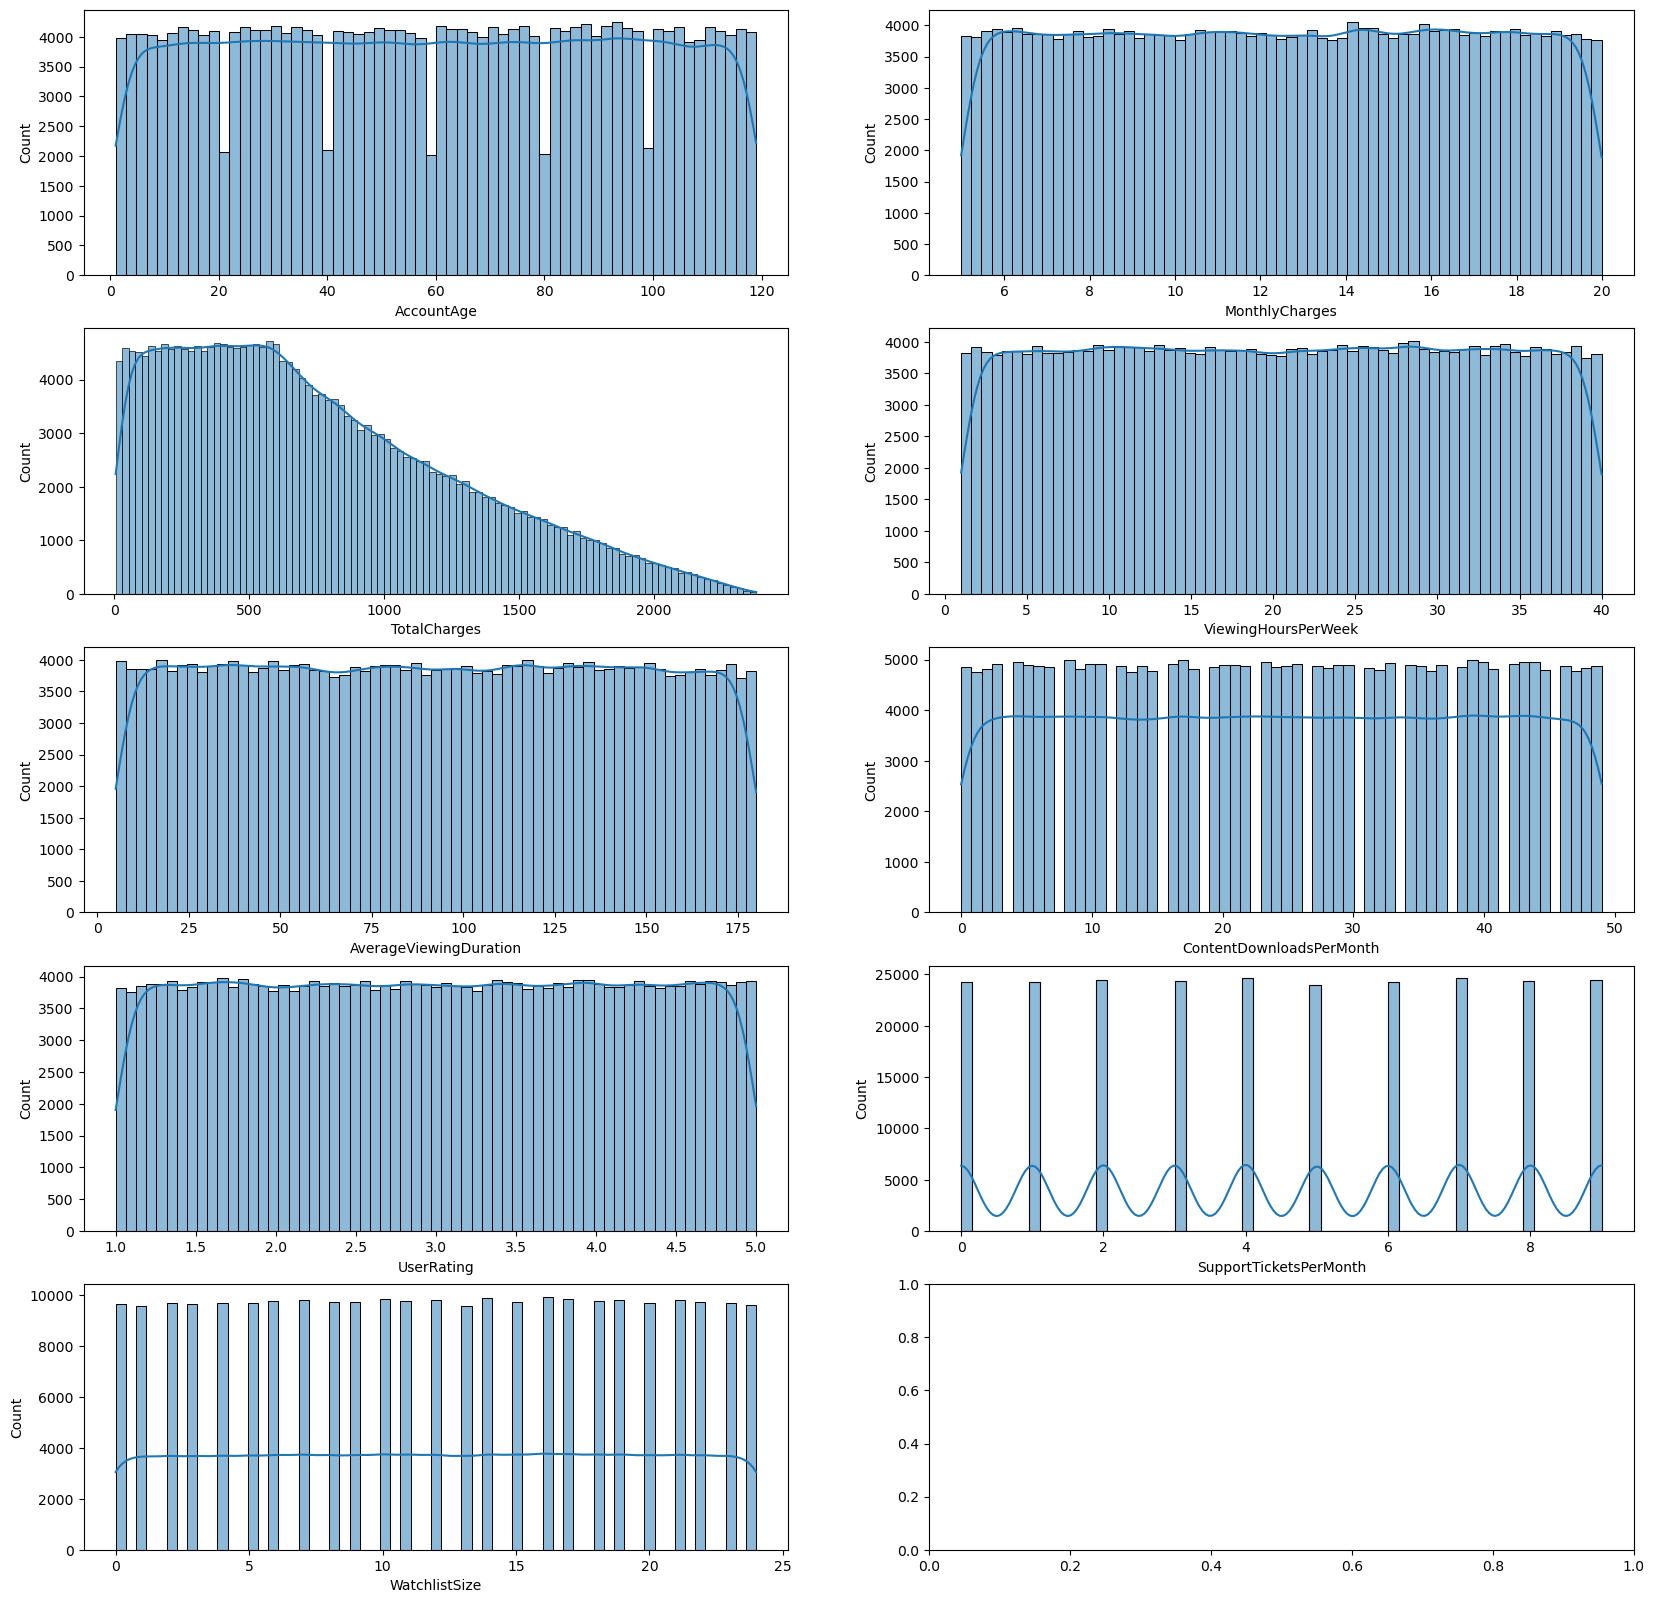

In [28]:
fig, ax = plt.subplots(nrows=math.ceil(len(num_columns)/2), ncols=2, figsize=(20,20))
ax_flatten = ax.flatten()
for i,col in enumerate(num_columns):
    sns.histplot(data=train, x=col, kde=True, ax=ax_flatten[i])

fig.savefig("num_col_distribution.png")

### Countplot of cat columns

In [29]:
categories_pct = {}

for col in cat_columns:
    if col !="CustomerID":
        col_pct = (train[col].value_counts()/train.shape[0])*100
        categories_pct[col] =  col_pct

In [30]:
categories_pct

{'SubscriptionType': SubscriptionType
 Standard    33.603104
 Basic       33.246235
 Premium     33.150660
 Name: count, dtype: float64,
 'PaymentMethod': PaymentMethod
 Electronic check    25.150234
 Credit card         24.990668
 Bank transfer       24.938573
 Mailed check        24.920525
 Name: count, dtype: float64,
 'PaperlessBilling': PaperlessBilling
 No     50.035482
 Yes    49.964518
 Name: count, dtype: float64,
 'ContentType': ContentType
 Both        33.528039
 TV Shows    33.285204
 Movies      33.186757
 Name: count, dtype: float64,
 'MultiDeviceAccess': MultiDeviceAccess
 No     50.058042
 Yes    49.941958
 Name: count, dtype: float64,
 'DeviceRegistered': DeviceRegistered
 Computer    25.082141
 Tablet      25.080501
 Mobile      24.986566
 TV          24.850792
 Name: count, dtype: float64,
 'GenrePreference': GenrePreference
 Comedy     20.124125
 Fantasy    20.081054
 Drama      19.994503
 Action     19.972353
 Sci-Fi     19.827965
 Name: count, dtype: float64,
 'Ge

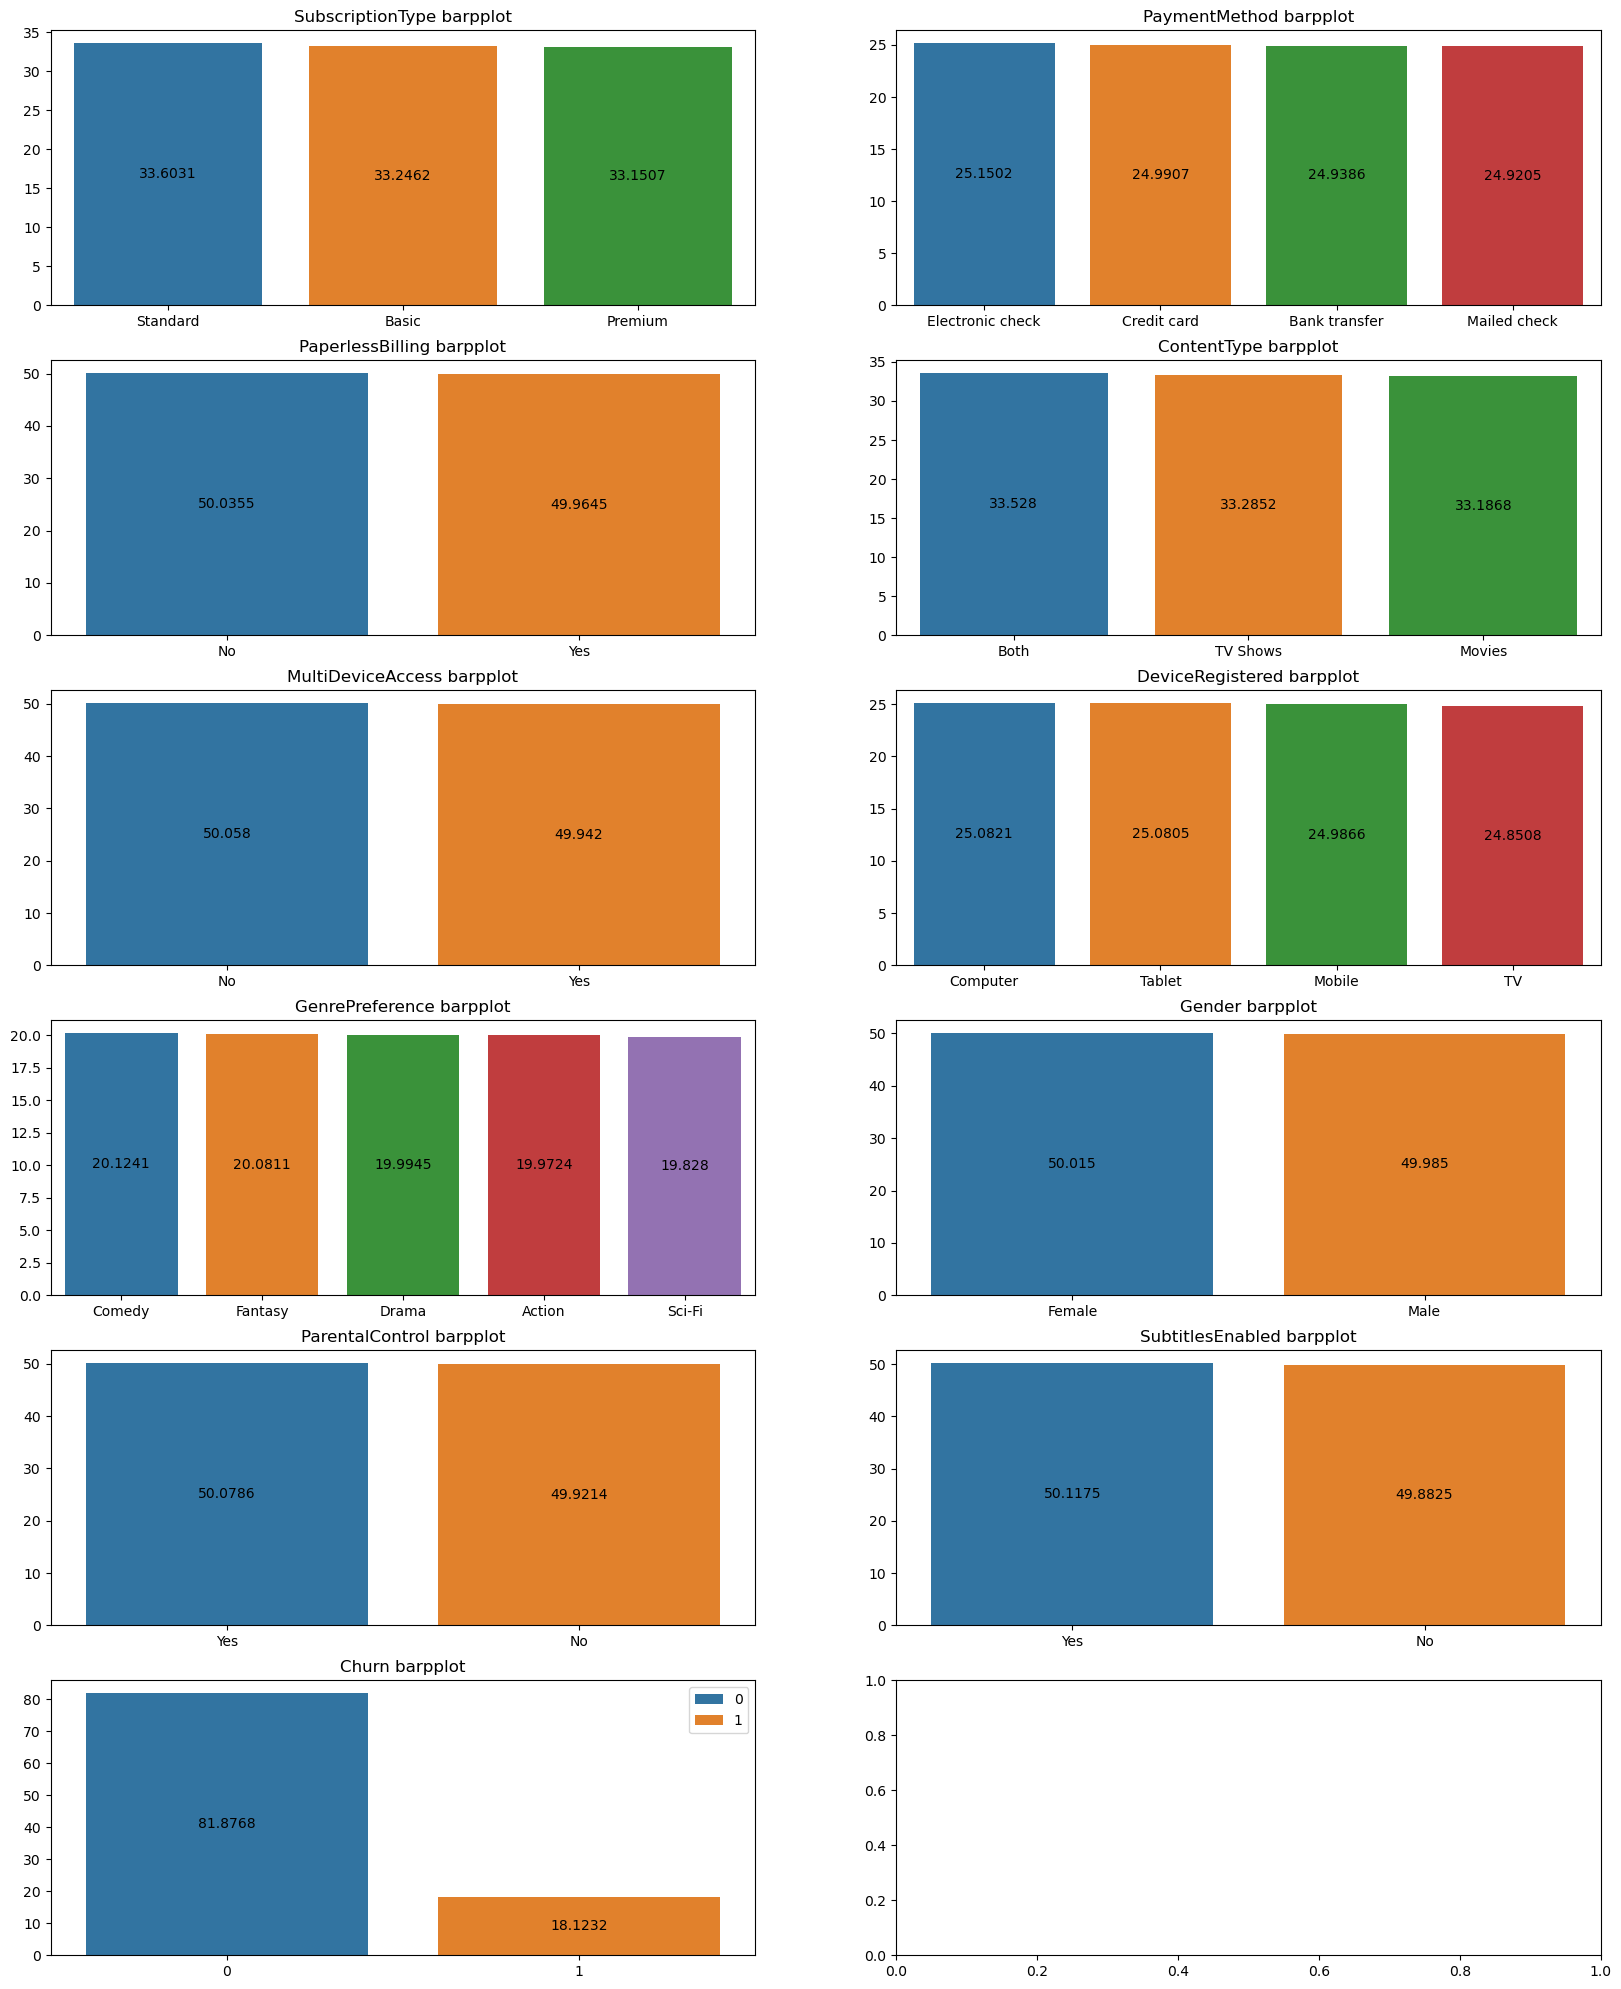

In [30]:
fig, ax = plt.subplots(nrows=math.ceil(len(cat_columns)/2), ncols=2, figsize=(20,25))
ax_flatten = np.ravel(ax)

i=0
for key, values in categories_pct.items():
    ax_flatten[i].set_title(f"{key} barpplot")
    sns.barplot(x=list(values.index), y=values.values, hue=list(values.index), ax=ax_flatten[i])
    for container in ax_flatten[i].containers:
        ax_flatten[i].bar_label(container, label_type="center")
        
    i+=1

plt.show()

fig.savefig("barplot_cat_cols.png")

### Boxplots

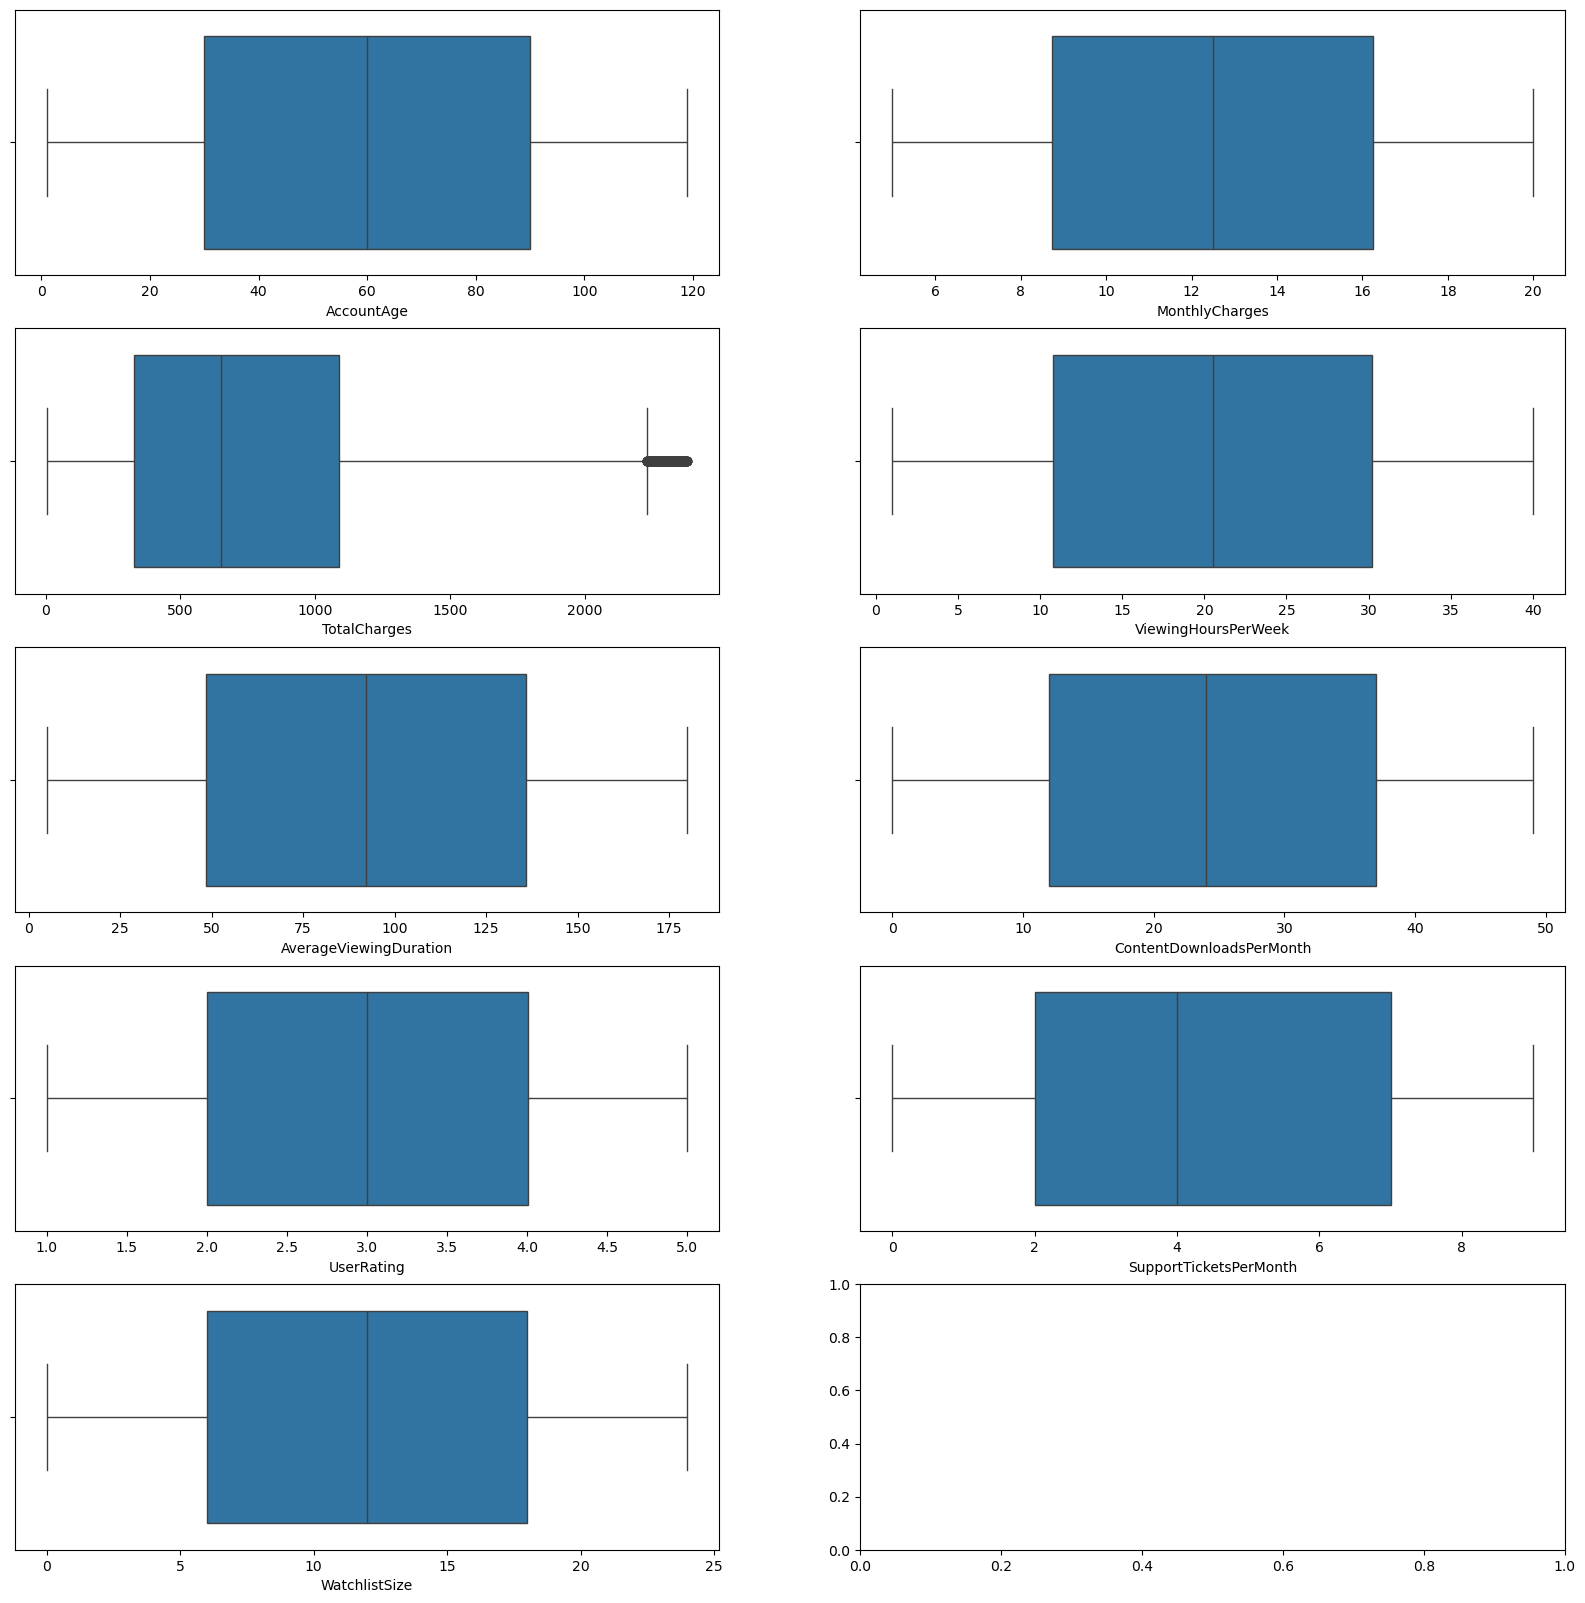

In [31]:
fig, ax = plt.subplots(nrows=math.ceil(len(num_columns)/2), ncols=2, figsize=(20,20))
ax_flatten = ax.flatten()
for i,col in enumerate(num_columns):
    sns.boxplot(x=train[col],ax=ax_flatten[i])

fig.savefig("num_col_boxplot.png")

## Bivariate Analysis
1. compare churn rate across categories
2. boxplots/violin plots for numerical v/s target
3. scatterplots and correlation for numeric

## Time based analysis
1. Trends over time(monthly churn, revenue).
2. rolling averages

## Customer Segmentation
1. Clustering (k-means, DBSCAN)
2. Compare Churn across clusters